## Predicting in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of  loan using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting  whether the customer will be paying back the loaned amount within 5 days of insurance of loan in time or not.


#### 1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

#### 2. Data
All of the dataset values were provided by a client.

#### 3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics

#### 4. Features
#####  Data Dictionary
The following are the features we'll use to predict our target variable (Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter).

*	label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
* msisdn : mobile number of user
* aon : age on cellular network in days
* daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30: Average main account balance over last 30 days
* rental90: Average main account balance over last 90 days
* last_rech_date_ma: Number of days till last recharge of main account
* last_rech_date_da: Number of days till last recharge of data account
* last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)
* cnt_ma_rech30: Number of times main account got recharged in last 30 days
* fr_ma_rech30: Frequency of main account recharged in last 30 days
* sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
* medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
* medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
* cnt_ma_rech90: Number of times main account got recharged in last 90 days
* fr_ma_rech90: Frequency of main account recharged in last 90 days
* sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)
* medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
* medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
* cnt_da_rech30: Number of times data account got recharged in last 30 days
* fr_da_rech30: Frequency of data account recharged in last 30 days
* cnt_da_rech90: Number of times data account got recharged in last 90 days
* fr_da_rech90: Frequency of data account recharged in last 90 days
* cnt_loans30: Number of loans taken by user in last 30 days
* amnt_loans30: Total amount of loans taken by user in last 30 days
* maxamnt_loans30: maximum amount of loan taken by the user in last 30 days
* medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
* cnt_loans90: Number of loans taken by user in last 90 days
* amnt_loans90: Total amount of loans taken by user in last 90 days
* maxamnt_loans90: maximum amount of loan taken by the user in last 90 days
* medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
* payback30: Average payback time in days over last 30 days
* payback90: Average payback time in days over last 90 days
* pcircle: telecom circle
* pdate: date

In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import flatten

# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
## Handling Imbalance dataset
from imblearn.combine import SMOTETomek

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc


# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

## Data acquisition

In [3]:
# Reading the csv file
df_micro_credit=pd.read_csv(r"C:\Users\devanshu suri\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv",parse_dates=['pdate'],index_col=None)
df_micro_credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
# Display The head ==> To Check if Data is Properly Imported
df_micro_credit.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df_micro_credit.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [6]:
# checking the features,duplicate values , nan values and unique bvalues in the Datasets

print("\nFeatures Present in the Dataset: \n", df_micro_credit.columns)
shape=df_micro_credit.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_micro_credit.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_micro_credit.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_micro_credit.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df_micro_credit.columns.values:
    print("Number of unique values of {} : {}".format(col, df_micro_credit[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',df_micro_credit.label.value_counts())



Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_

In [7]:
#Removing irrelevant features
df_micro_credit.drop(["Unnamed: 0","pcircle","msisdn","pdate"],axis=1,inplace=True)

In [8]:
#Lets describe the dataset
df_micro_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


* According to Described Information:


>> 1. From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. 

>>2. Further, the minimum is negative which is not even possible for most of the features notably daily recharge , main account balance, aon, and last recharge which can't be negative and maximum values for some features, notably for aon ,maxamnt_loans30,medianmarechprebal90,medianmarechprebal30 are unrealistic. 

>>3. Most the features has mode is greater than median this suggests the presence of outliers in the data and All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode ) like weight and height are right and left skewed.


## Data Preprocessing 

### Data Exploration (exploratory data analysis or EDA)


In [9]:
#Let's check the positive values in each features
(df_micro_credit >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

* In some features the negtive values is not possible so I'm removing the negative values in that features except rental30','rental90 features.So in next step i'm dropping these columns take this features later while importing 

In [10]:
# dropping these features but  used thses features later
df_micro_credit.drop(['rental30','rental90'],axis=1,inplace=True)

In [11]:
# Removing negative values in each features
index=[]
for cols in df_micro_credit.columns.values:
    Index_1=df_micro_credit[df_micro_credit[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

* In above loop successfully removed negative values i.e 9922

In [12]:
df_micro_credit.drop(index_fl,inplace=True)

In [13]:
(df_micro_credit >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [14]:
df_micro_credit[20:30]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
20,1,100.0,769.614000,777.460000,6.0,0.0,770,5,20.0,8867.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
21,0,378.0,514.693333,515.200000,2.0,0.0,773,1,0.0,773.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000,0.000000
22,1,463.0,1540.000000,1541.000000,4.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,2.0,12,6,0.0,0.000,42.000000
23,1,857.0,58.023333,58.023333,2.0,0.0,1539,4,12.0,6164.0,...,4,24,6.0,0.0,4.0,24,6,0.0,6.000,6.000000
24,0,966.0,291.563333,291.563333,0.0,0.0,0,0,0.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
25,1,656.0,63.250000,63.250000,1.0,0.0,770,15,1.0,12674.0,...,5,30,6.0,0.0,5.0,30,6,0.0,1.800,1.800000
26,1,1179.0,3703.272000,3712.840000,2.0,0.0,770,6,5.0,5395.0,...,4,24,6.0,0.0,5.0,30,6,0.0,6.000,6.000000
27,0,871.0,505.600000,508.000000,16.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
28,1,1610.0,6688.559333,6705.260000,1.0,0.0,4048,9,1.0,32149.0,...,8,48,6.0,0.0,8.0,48,6,0.0,1.375,1.666667
29,1,67.0,16.166667,16.166667,3.0,0.0,1539,2,12.0,3086.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000


In [15]:
#impoting the data again to get features rental90,rental30 and pdate with values  back

df_micro_credit_new=pd.read_csv(r"C:\Users\devanshu suri\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv",parse_dates=['pdate'],index_col=None)
df_micro_credit_new

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [16]:
df_micro_credit['rental30']=df_micro_credit_new['rental30']
df_micro_credit['rental90']=df_micro_credit_new['rental90']
df_micro_credit['pdate']=df_micro_credit_new['pdate']

* Impoting the data again to get features rental90,rental30 and pdate with values  back

In [17]:
df_micro_credit.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,2016-07-20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,2016-08-10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,2016-08-19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,2016-06-06
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,2016-06-22


## Univariate  Analysis

In [18]:
# Let's find out how many of each class there
df_micro_credit['label'].value_counts()

1    179392
0     23727
Name: label, dtype: int64

In [19]:
#label percentage in dataset
print('Percentage',df_micro_credit.label.value_counts(normalize=True))

Percentage 1    0.883187
0    0.116813
Name: label, dtype: float64


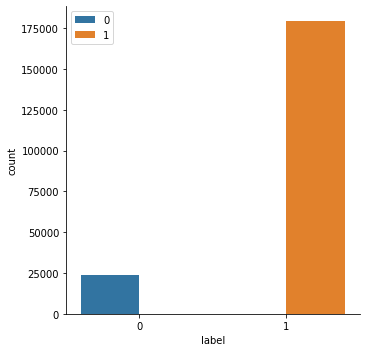

In [20]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='label',data=df_micro_credit,kind='count',hue='label')
plt.legend()
#here we we see data is inbalanced

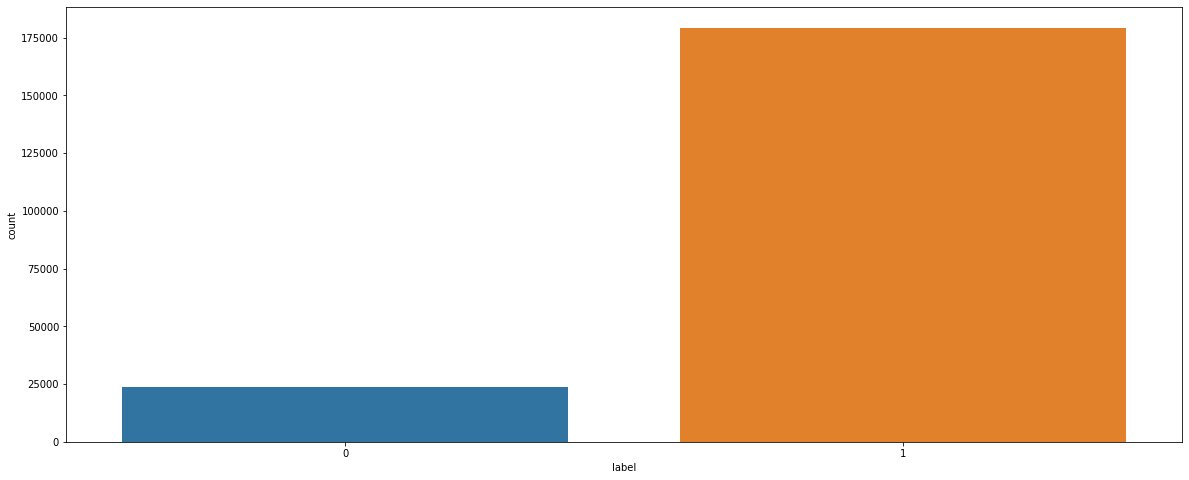

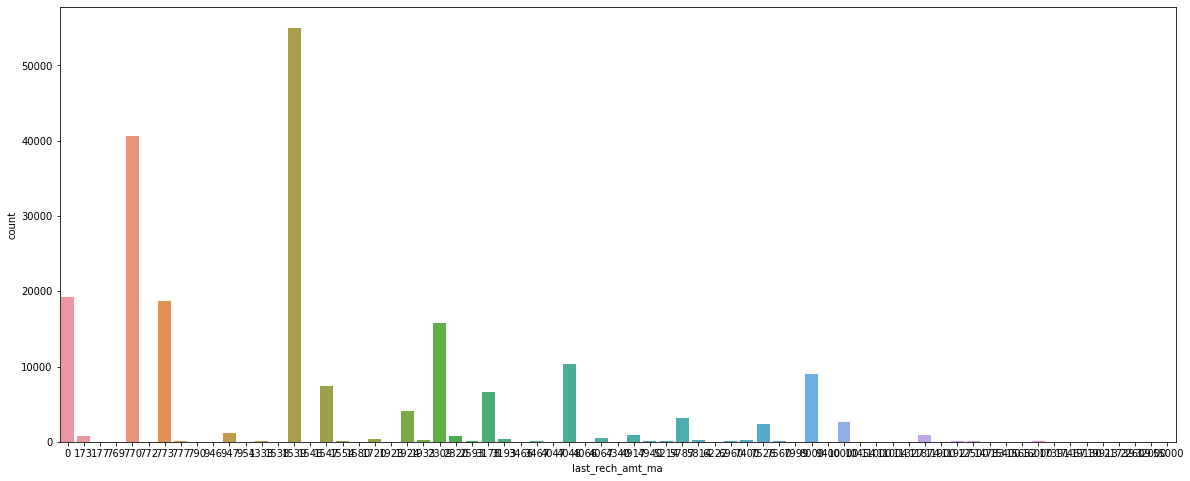

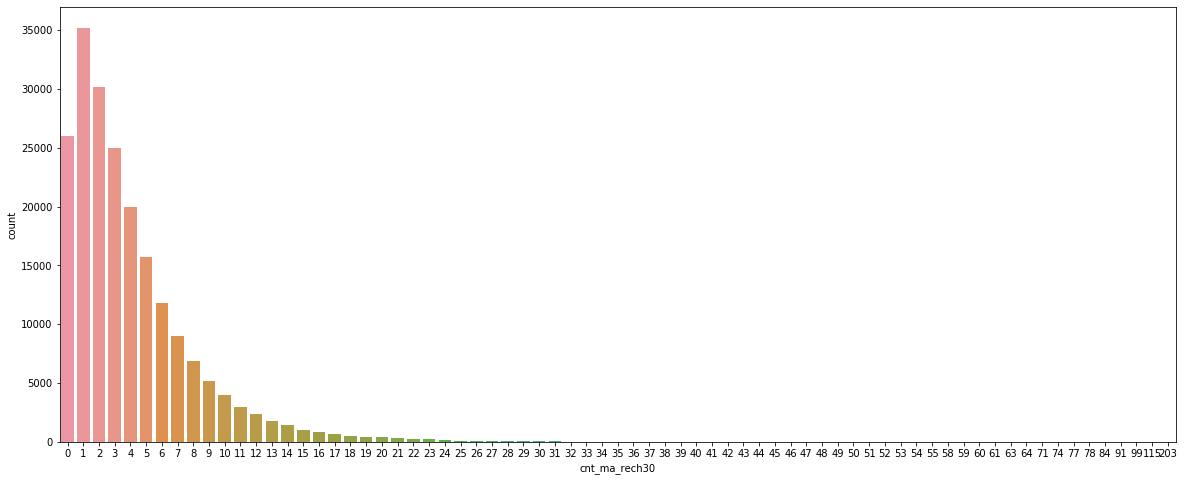

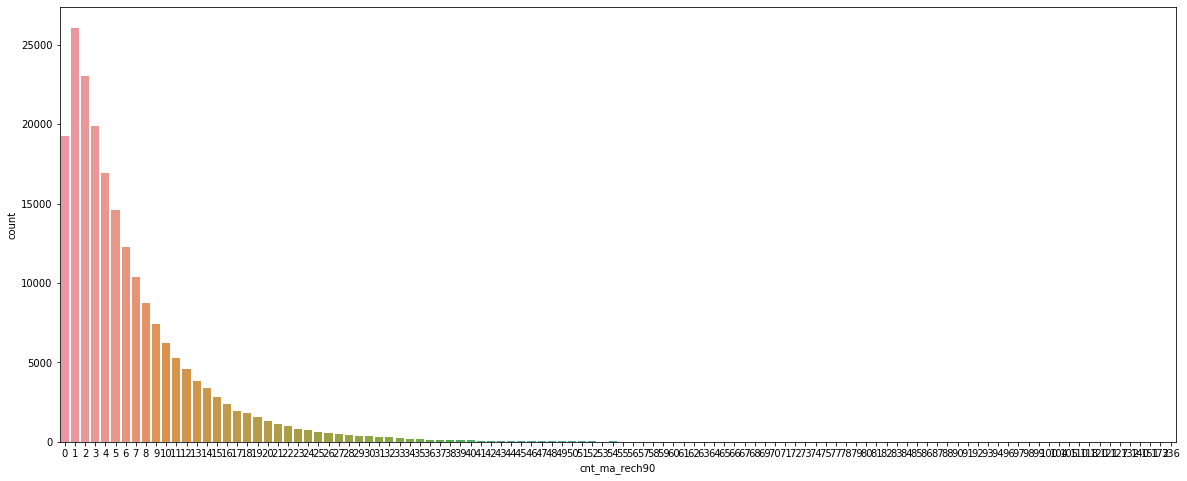

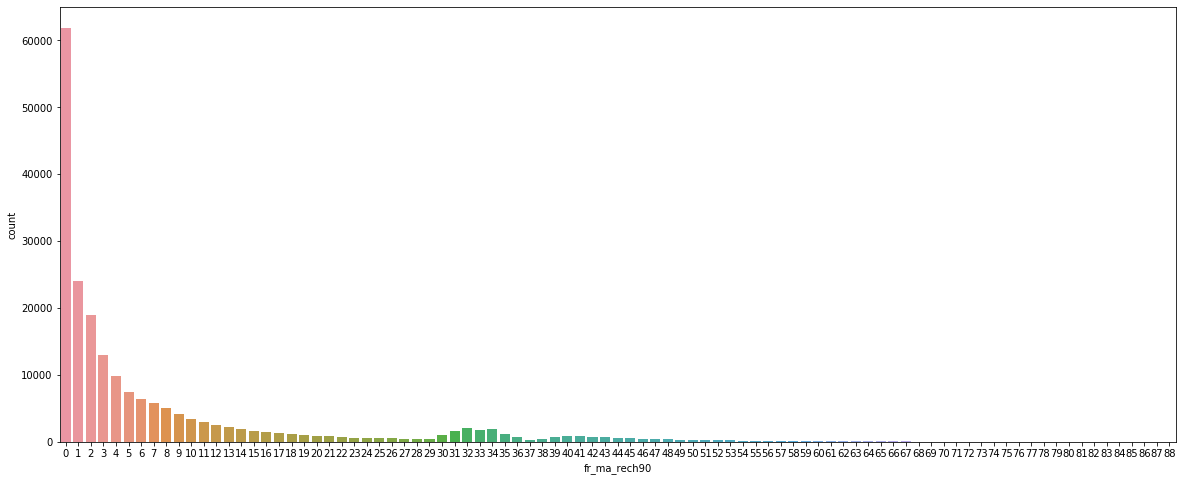

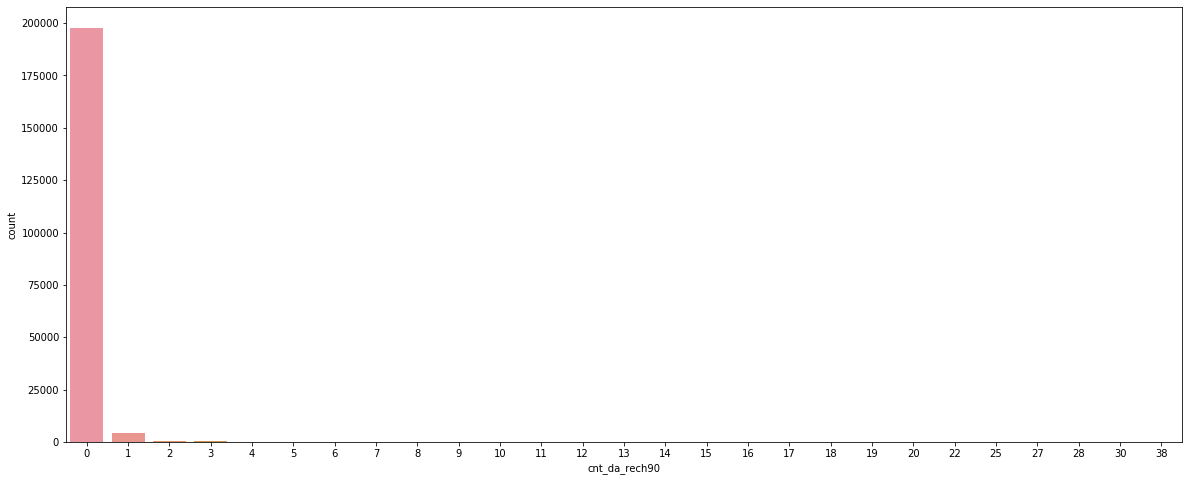

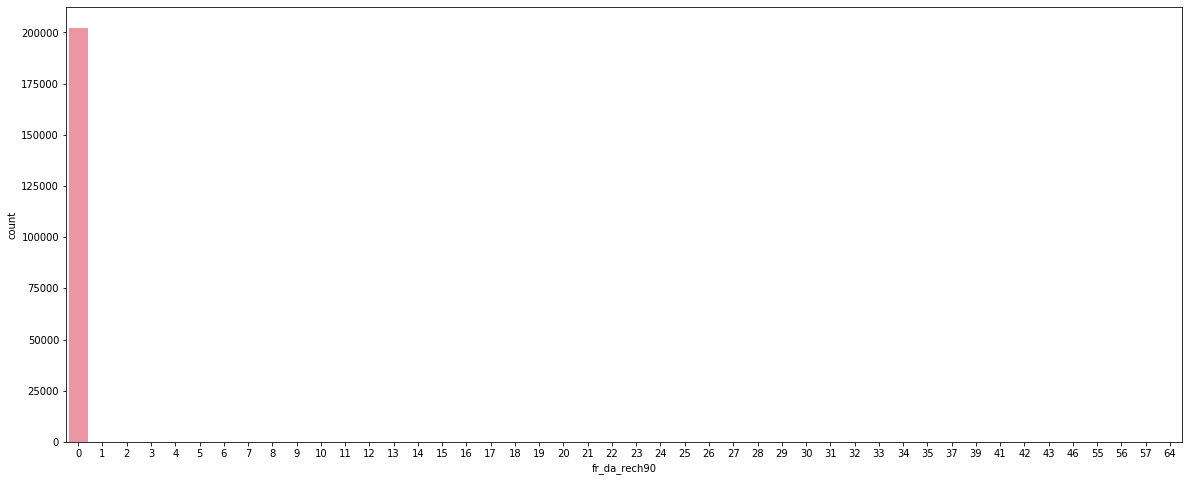

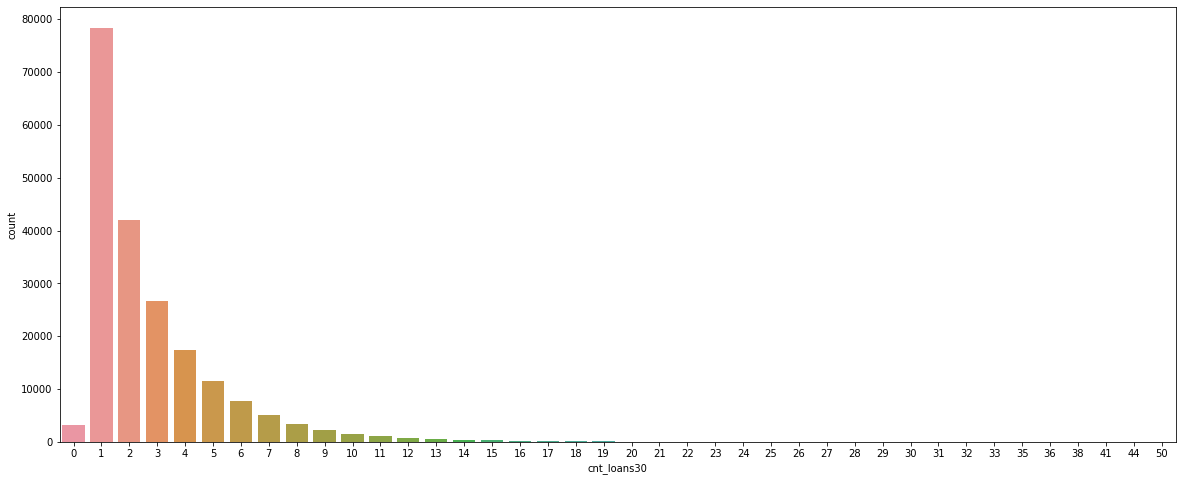

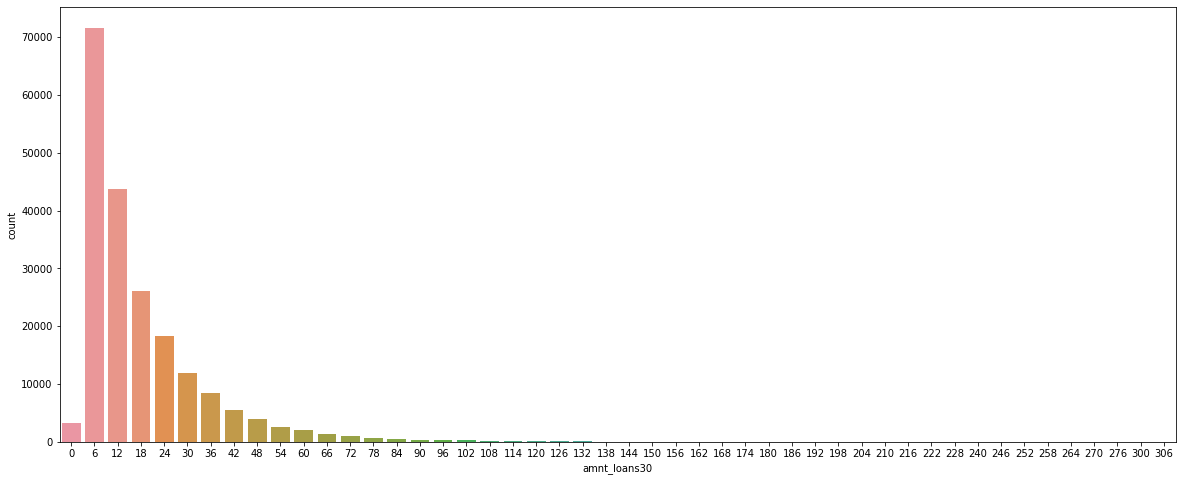

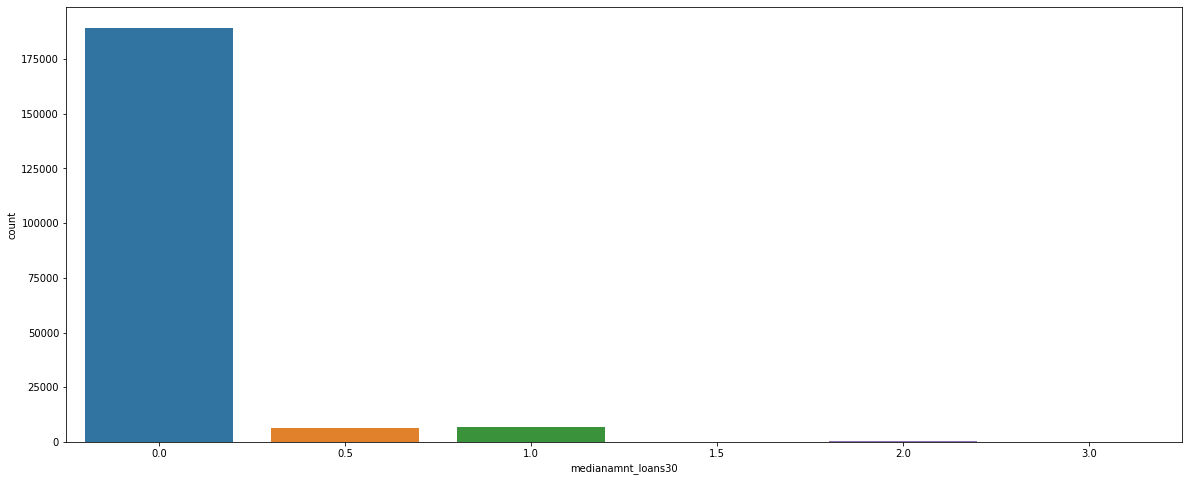

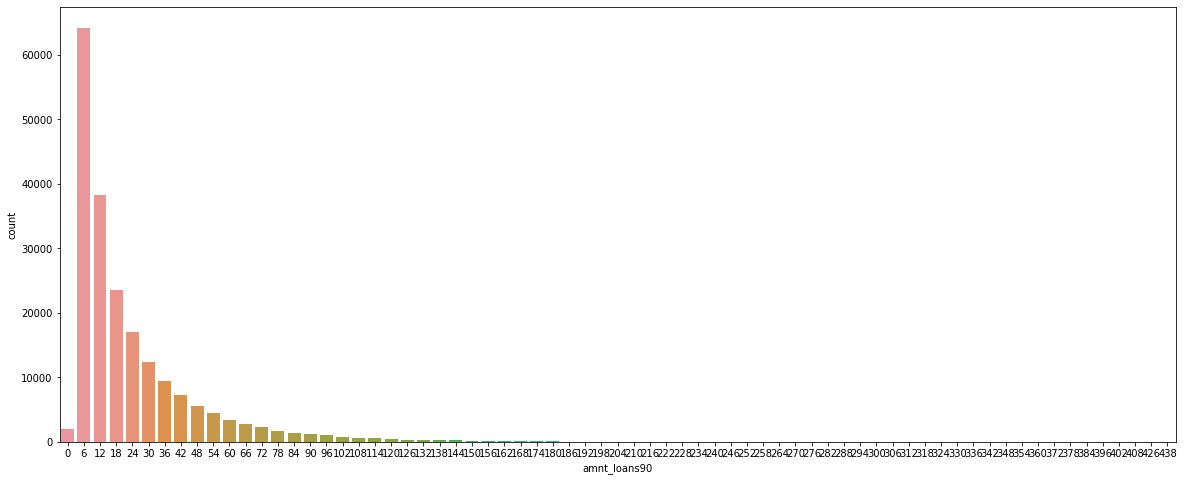

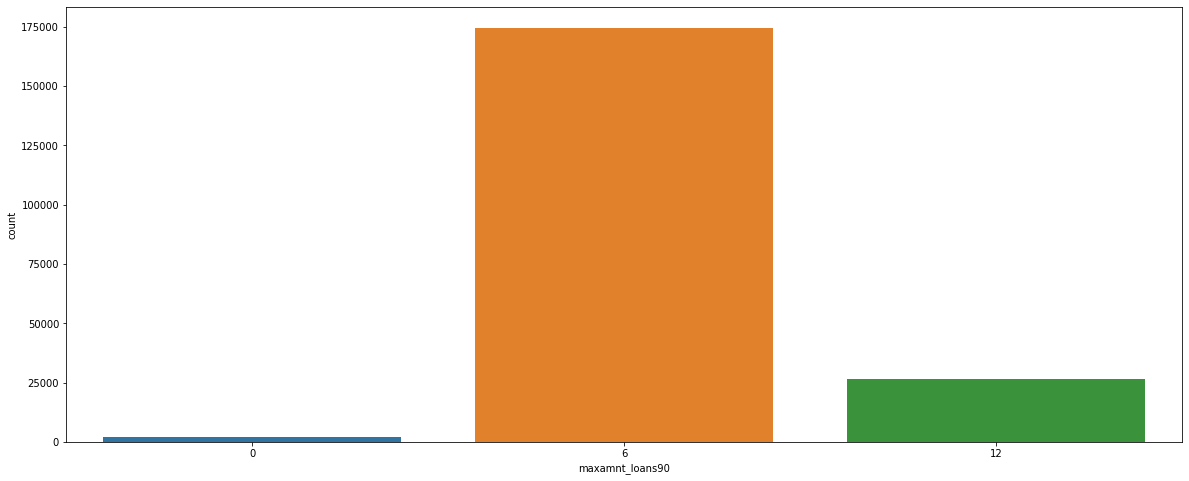

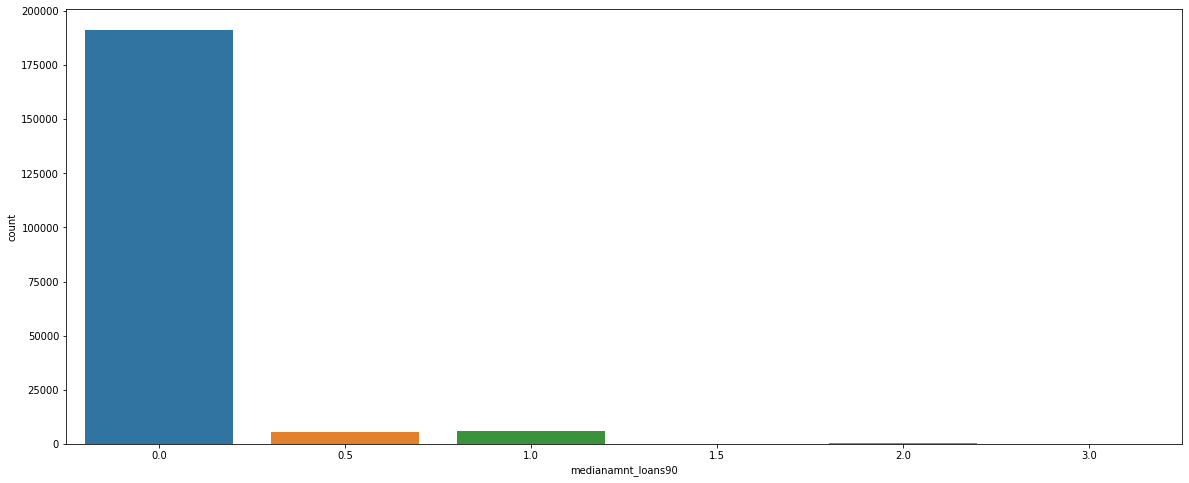

In [21]:
#Lets plot the countplot of list of features 

list_of_col=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]

for i in list_of_col:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_micro_credit)
    plt.show()

label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr90               AxesSubplot(0.125,0.763028;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_amt_ma           AxesSubplot(0.125,0.699225;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.398529,0.699225;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.672059,0.699225;0.227941x0.053169)
sumamnt_ma_rech30          AxesSubplot(0.125,0.635423;0.227941x0.053169)
medianamnt_ma_rech30    AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianmarechprebal30    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
cnt_ma_rech90               AxesSubplot(0.125,0.57162;0.227941x0.053169)
fr_ma_rech90             AxesSubplot(0.398529,0.571

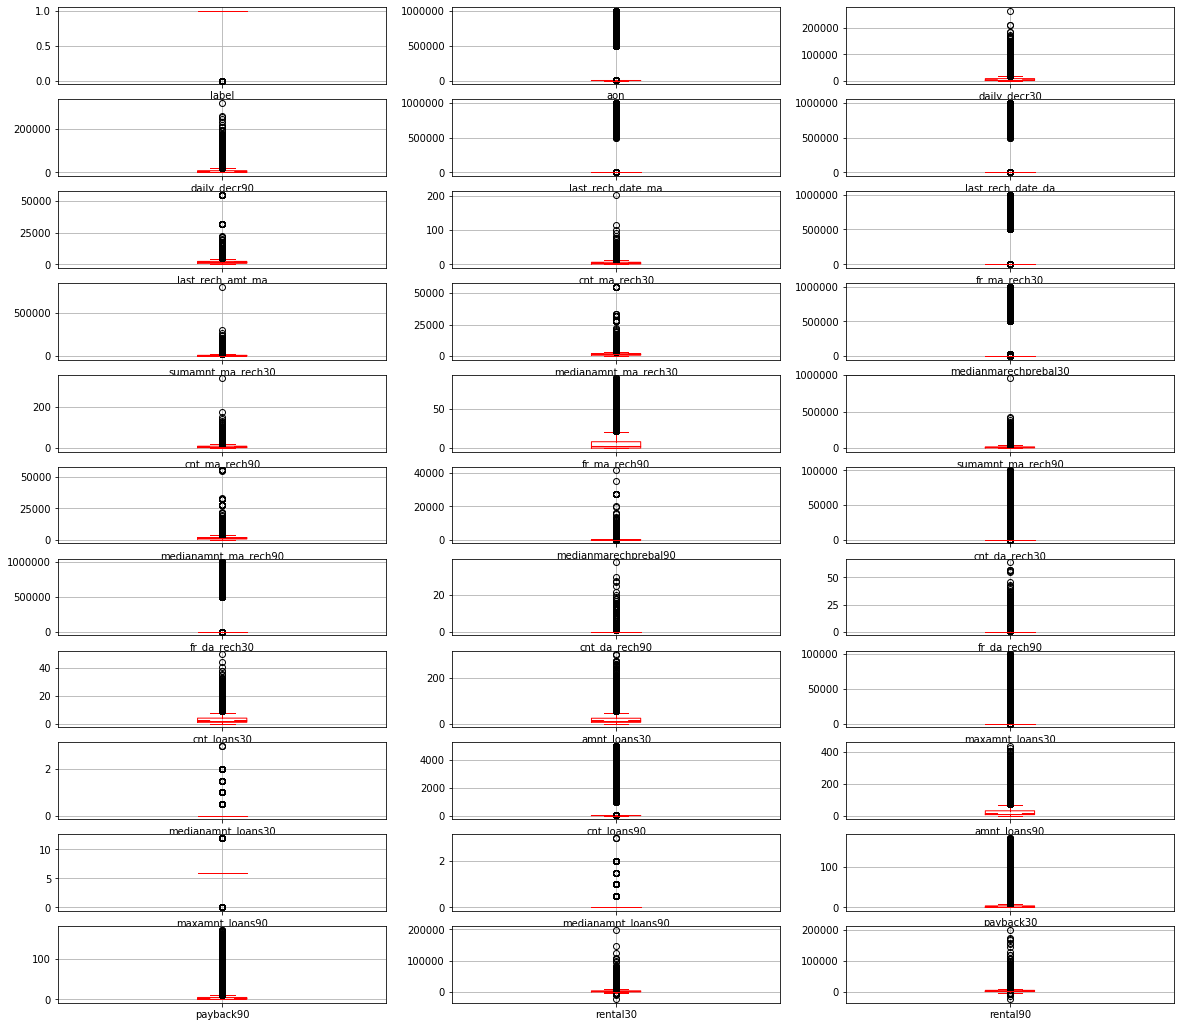

In [22]:
# Plotting the boxplot in order to check few statistical values and outliers
df_micro_credit.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4DD33C608>,
      dtype=object)

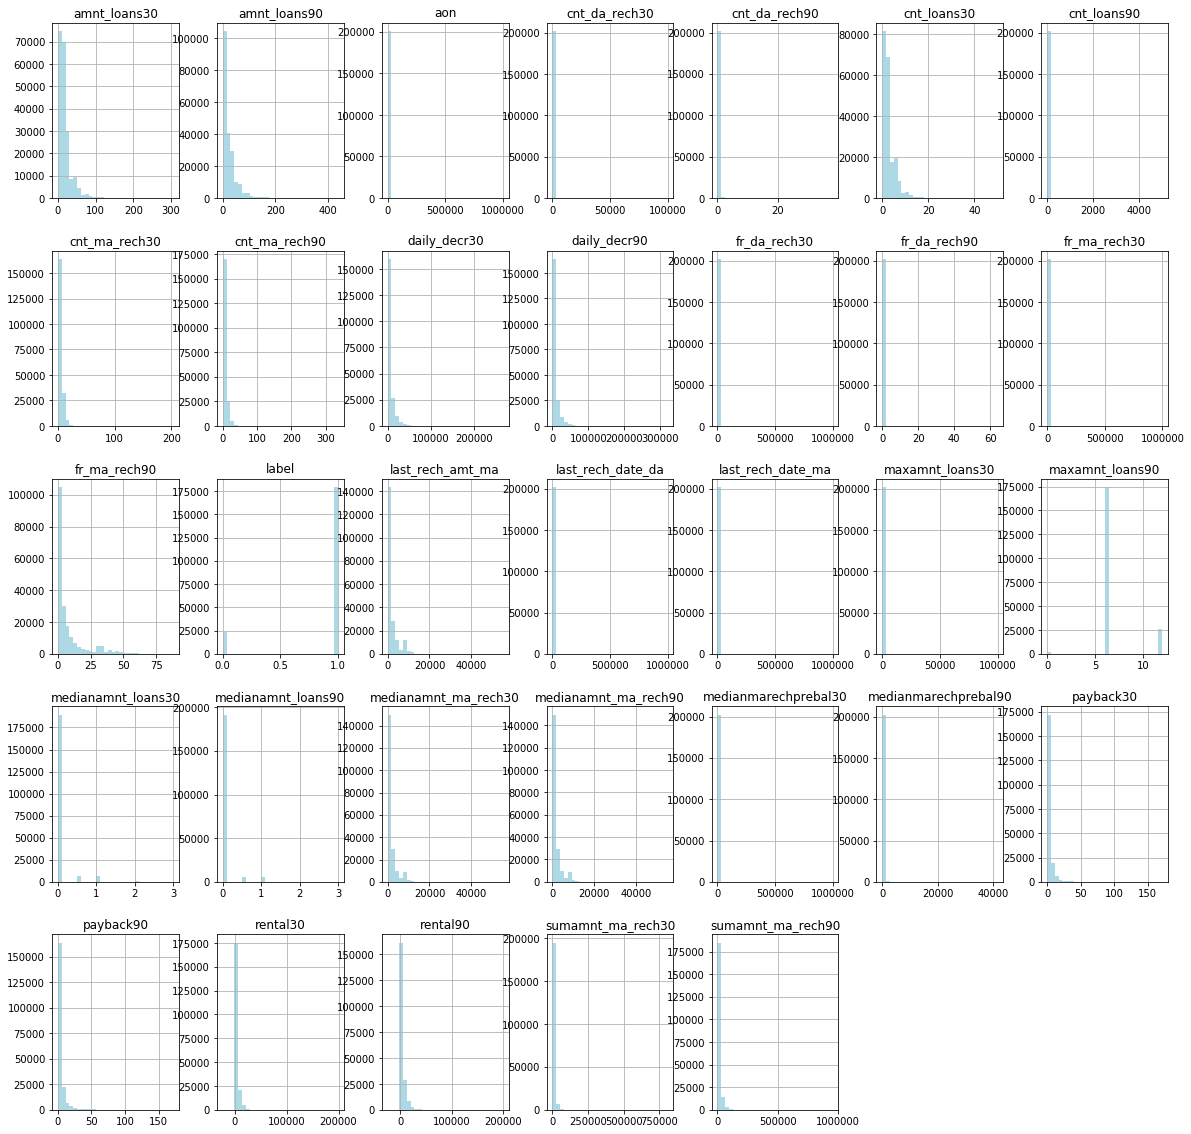

In [23]:
 #Checking the Distribution using the histogram plot.
df_micro_credit.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue') 

## Bivarient  Analysis


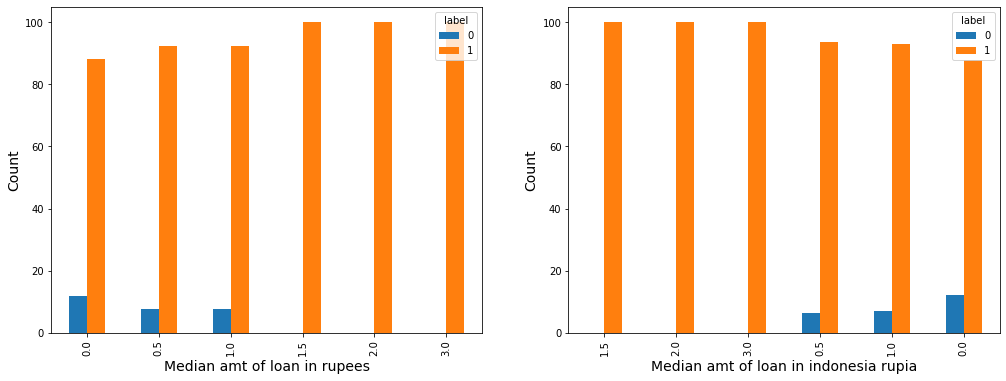

In [24]:
table_medianamnt_loans90  = pd.crosstab(df_micro_credit['medianamnt_loans90'], df_micro_credit['label'])
table_medianamnt_loans30 = pd.crosstab(df_micro_credit['medianamnt_loans30'], df_micro_credit['label'])
table_maxamnt_loans90  = pd.crosstab(df_micro_credit['maxamnt_loans90'], df_micro_credit['label'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_medianamnt_loans90.div(table_medianamnt_loans90.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_medianamnt_loans30.div(table_medianamnt_loans30.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in indonesia rupia",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


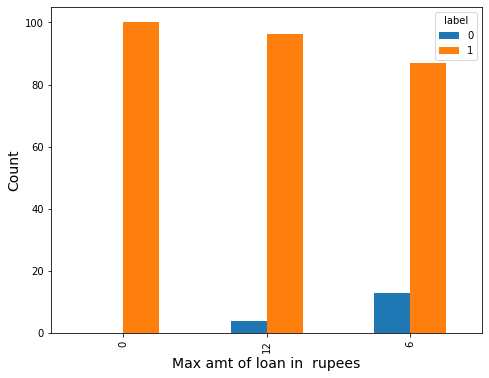

In [25]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,2)
(table_maxamnt_loans90.div(table_maxamnt_loans90.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Max amt of loan in  rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

In [27]:
# Checking the label corelation with other features
df_micro_credit.corr()['label'].sort_values()

fr_da_rech90           -0.006770
medianmarechprebal30   -0.003660
aon                    -0.003257
fr_da_rech30           -0.000628
fr_ma_rech30            0.000269
cnt_da_rech90           0.000457
maxamnt_loans30         0.000591
last_rech_date_da       0.000777
last_rech_date_ma       0.003291
cnt_da_rech30           0.003886
cnt_loans90             0.005160
medianamnt_loans90      0.033279
medianmarechprebal90    0.035454
medianamnt_loans30      0.041934
payback30               0.042385
payback90               0.042864
rental30                0.053048
rental90                0.070185
fr_ma_rech90            0.073161
maxamnt_loans90         0.080027
medianamnt_ma_rech90    0.109699
last_rech_amt_ma        0.120954
medianamnt_ma_rech30    0.130066
daily_decr90            0.160075
daily_decr30            0.161804
cnt_loans30             0.188395
amnt_loans30            0.189479
amnt_loans90            0.192480
sumamnt_ma_rech30       0.193586
sumamnt_ma_rech90       0.197374
cnt_ma_rec

* From above we can say that most the features has same correleations  values ,so we are going to drop them in next steps

In [28]:
#Feature Removal
print(f"Number of columns before deleting: {df_micro_credit.shape[1]}")
del_cols = ["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30","pdate"]
df_micro_credit.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_micro_credit.shape[1]}")

Number of columns before deleting: 34
Number of columns after deleting: 23


In [29]:
# Lets remove outliers in last_rech_date_ma,last_rech_date_da,aon,cnt_loans90 and maxamnt_loans30
df_clean = df_micro_credit[df_micro_credit['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]


In [30]:
#Lets check how much data we lost
df_clean.shape

(197074, 23)

In [31]:
#Let's convert the currency sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90 which is in rupees conver into indonesia rupia
from currency_converter import CurrencyConverter
c = CurrencyConverter()
li=['sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90']
df_clean['sumamnt_ma_rech90']=df_clean['sumamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianmarechprebal90']=df_clean['medianmarechprebal90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianamnt_ma_rech90']=df_clean['medianamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))


In [32]:
#checking skewness values
df_clean.skew()
#From below output it is clear that skewness exist

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

In [33]:
#lets remove the skewness
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])
    elif df_clean.skew().loc[i]<-0.5:
        df_clean[i]=np.square(df_clean[i])
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.463740
medianamnt_ma_rech90    -2.600516
medianmarechprebal90    -1.825125
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

In [34]:
df_clean.isna().sum()

label                   0
aon                     0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
rental90                0
dtype: int64

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.463740
medianamnt_ma_rech90    -2.600516
medianmarechprebal90    -1.825125
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

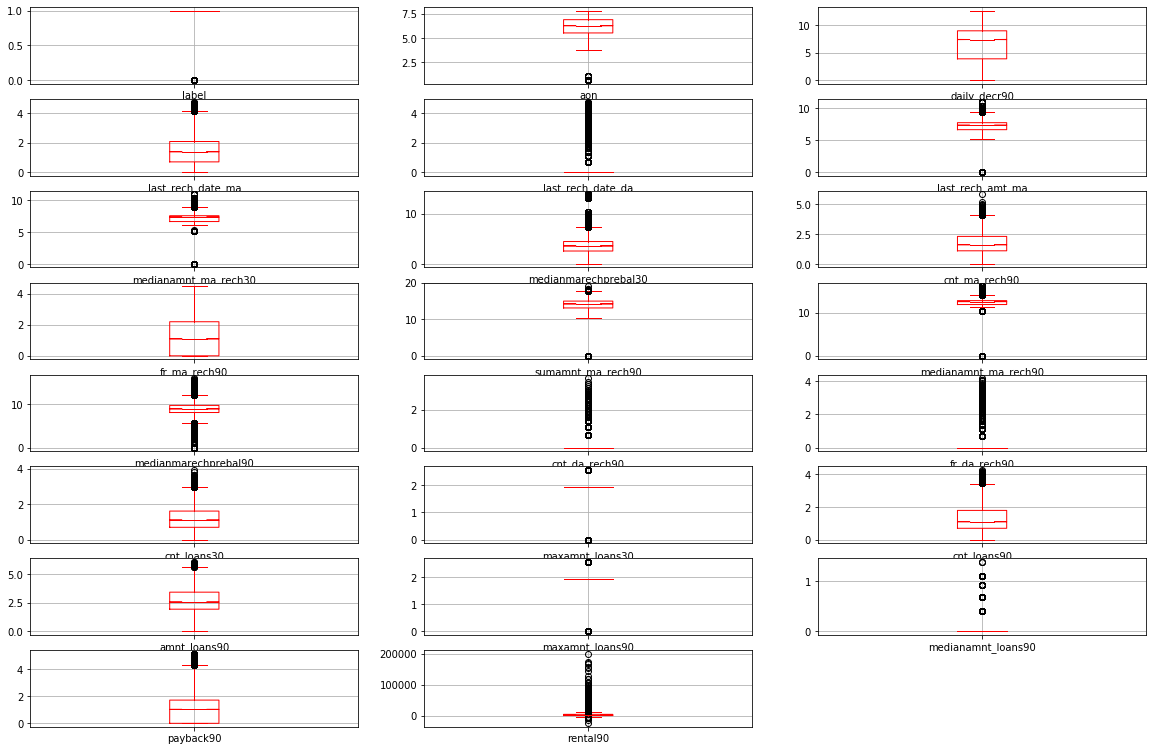

In [36]:
# Plotting the boxplot in order to check few statistical values and outliers
df_clean.plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)
df_clean.skew()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E48086AA08>,
      dtype=object)

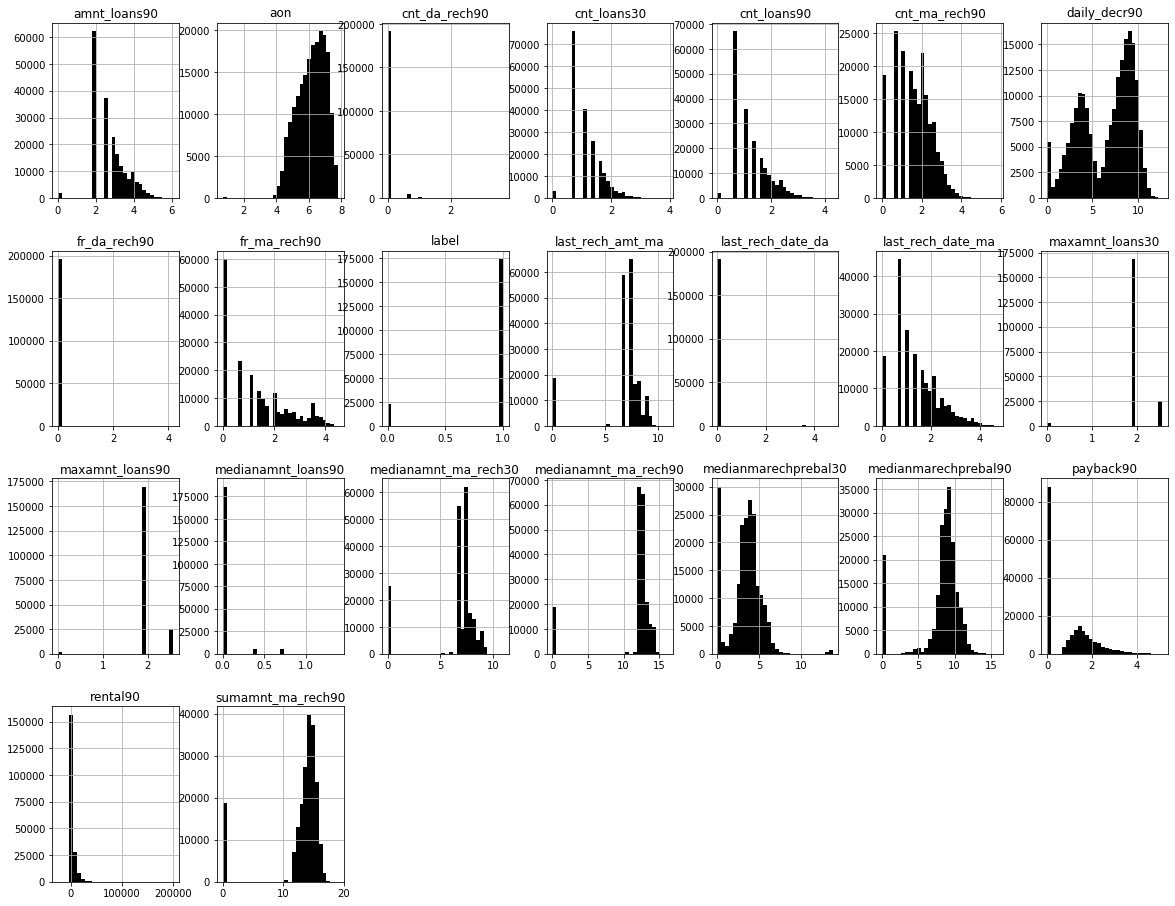

In [37]:
 #Checking the Distribution using the histogram plot.
df_clean.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='black') 

(23.0, 0.0)

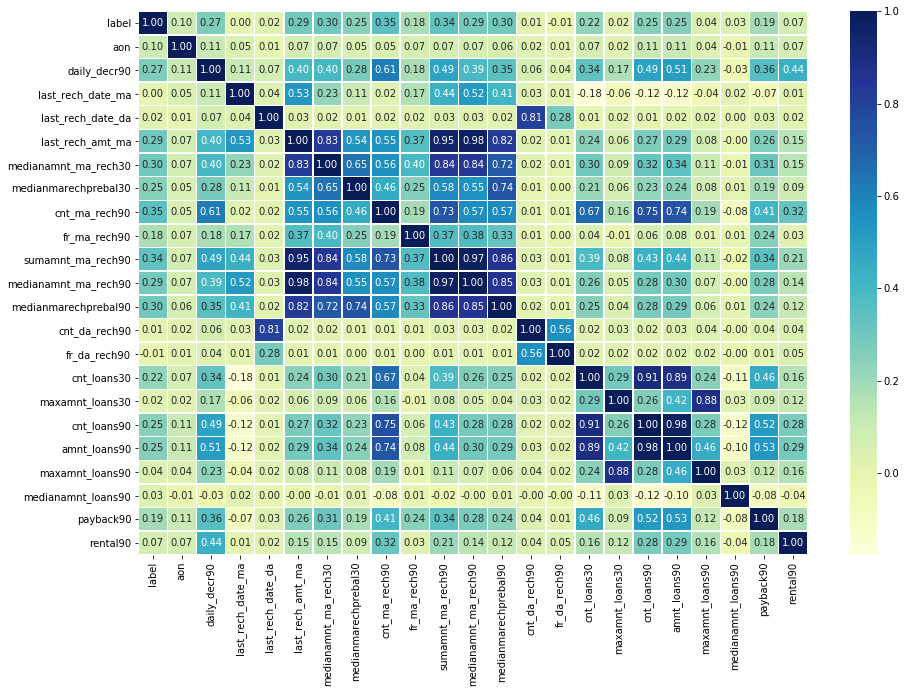

In [38]:
# Plotting Heatmap for Correlation
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* From above we can say that after cleaning the data we see clearly most the features has same correleations  values ,so we are going to drop them in next steps.

In [39]:
#Feature Removal
print(f"Number of columns before deleting: {df_clean.shape[1]}")
del_cols = ['medianamnt_ma_rech30','medianmarechprebal30','maxamnt_loans30']
df_clean.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_clean.shape[1]}")

Number of columns before deleting: 23
Number of columns after deleting: 20


In [40]:
# Split data into X and y
X = df_clean.drop("label", axis=1)

Y = df_clean["label"]

In [41]:
# Independent variables (no target column)
X.head()

,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,5.609472,8.028178,1.098612,0.0,7.339538,1.098612,3.091042,13.313717,12.620572,7.297261,0.0,0.0,1.098612,1.098612,2.564949,1.945910,0.0,3.401197,260.13
1,6.569481,9.403087,3.044522,0.0,8.663542,0.693147,0.000000,13.945051,13.945051,9.393293,0.0,0.0,0.693147,0.693147,2.564949,2.564949,0.0,0.000000,3691.26
2,6.284134,7.243513,1.386294,0.0,7.339538,0.693147,0.000000,12.620572,12.620572,9.476249,0.0,0.0,0.693147,0.693147,1.945910,1.945910,0.0,0.000000,900.13
3,5.488938,3.101353,3.737670,0.0,6.854355,0.693147,0.000000,12.134985,12.134985,6.200003,0.0,0.0,1.098612,1.098612,2.564949,1.945910,0.0,0.000000,159.42
4,6.854355,5.021373,1.609438,0.0,7.745003,2.197225,1.098612,15.346266,13.250002,8.837174,0.0,0.0,2.079442,2.079442,3.761200,1.945910,0.0,1.203973,1098.90


In [42]:
# Target variable
Y


0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 197074, dtype: int64

In [43]:
#checking shape of input variable
X.shape

(197074, 19)

In [44]:
#checking shape of target variable
Y.shape

(197074,)

In [45]:
# using SMOTETomek to balance the dataset

smk = SMOTETomek(random_state=42)
x,y=smk.fit_sample(X,Y)
x.shape, y.shape

((344142, 19), (344142,))

In [46]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x1=scale.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x

,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,-0.530614,0.770448,-0.365231,-0.153706,0.473382,-0.193028,1.609144,0.373113,0.491945,0.058076,-0.143962,-0.070714,0.141754,-0.056779,-0.007458,-0.200767,-0.225364,2.559820,-0.534233
1,0.593777,1.202419,1.470745,-0.153706,0.923131,-0.644152,-0.909821,0.487292,0.759415,0.615368,-0.143962,-0.070714,-0.722564,-0.767312,-0.007458,2.499226,-0.225364,-0.736025,0.130511
2,0.259570,0.523920,-0.093801,-0.153706,0.473382,-0.644152,-0.909821,0.247756,0.491945,0.637425,-0.143962,-0.070714,-0.722564,-0.767312,-0.807560,-0.200767,-0.225364,-0.736025,-0.410240
3,-0.671786,-0.777470,2.124733,-0.153706,0.308571,-0.644152,-0.909821,0.159936,0.393883,-0.233662,-0.143962,-0.070714,0.141754,-0.056779,-0.007458,-0.200767,-0.225364,-0.736025,-0.553745
4,0.927428,-0.174235,0.116736,-0.153706,0.611114,1.029297,-0.014536,0.740707,0.619054,0.467508,-0.143962,-0.070714,2.232560,1.662019,1.538683,-0.200767,-0.225364,0.430655,-0.371731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344137,-0.852851,-1.250750,1.747189,-0.153706,0.369459,-0.644152,-0.909821,0.192374,0.430105,0.630233,-0.143962,-0.070714,-0.722564,-0.767312,-0.807560,-0.200767,-0.225364,-0.736025,-0.581183
344138,1.565187,0.304139,-1.401777,-0.153706,-2.019773,-1.415353,-0.909821,-2.034716,-2.056706,-1.882115,-0.143962,-0.070714,-0.722564,-0.767312,-0.807560,-0.200767,-0.225364,-0.736025,-0.584631
344139,0.519651,-1.240644,-0.093801,-0.153706,0.546334,-0.644152,-0.909821,0.286617,0.535337,-0.017838,-0.143962,-0.070714,-0.722564,-0.767312,-0.807560,-0.200767,-0.225364,-0.736025,-0.539750
344140,1.133528,-1.751858,-1.401777,-0.153706,-2.019773,-1.415353,-0.909821,-2.034716,-2.056706,-1.882115,-0.143962,-0.070714,-0.722564,-0.767312,-0.807560,-0.200767,-0.225364,-0.736025,-0.105596


In [47]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.

#from imblearn.over_sampling import SMOTE
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Random Forest *****************************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Max Accuracy Score corresponding to Random State  89 is: 0.9478562815092475


Learning Score :  0.999742111705586
Accuracy Score :  0.94769646515277
Cross Val Score :  0.9432073267621716
log_loss :  1.806526872303173
roc auc score :  0.947696251946023


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95 

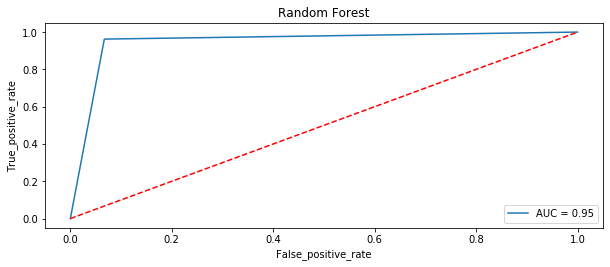

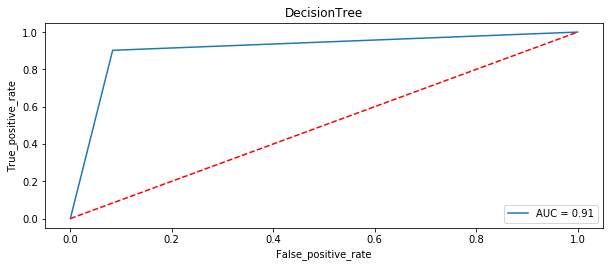

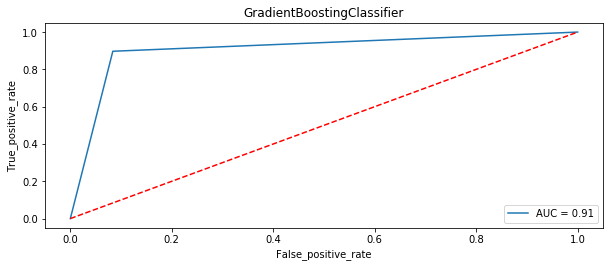

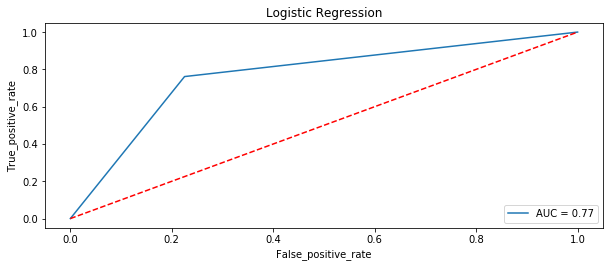

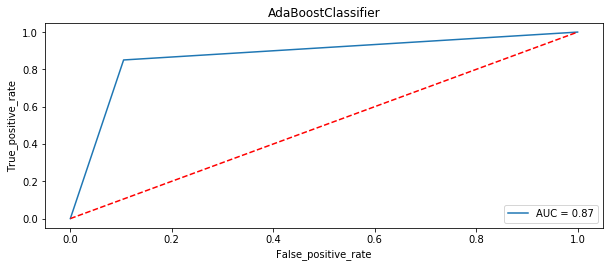

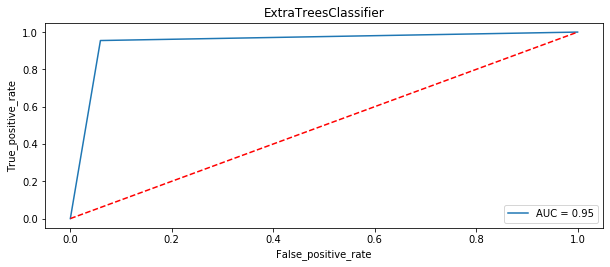

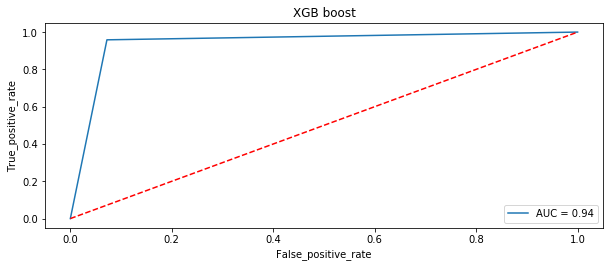

In [48]:
import sklearn.metrics as metrics
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Random Forest",RandomForestClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("Logistic Regression",LogisticRegression()))
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
models.append(("ExtraTreesClassifier",ExtraTreesClassifier()))
models.append(("XGB boost",XGBClassifier()))


#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
logLoss = []

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
#................Finding log_loss..................    

    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    print('log_loss : ', log_loss)
    logLoss.append(log_loss)
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [49]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore,'log_loss':logLoss}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve,log_loss
0,Random Forest,99.9742,94.7696,94.3207,94.7696,1.80653
1,DecisionTree,99.9771,90.9457,90.5374,90.9457,3.12729
2,GradientBoostingClassifier,90.4981,90.674,90.1716,90.674,3.22112
3,Logistic Regression,76.3527,76.8165,76.4376,76.8164,8.0074
4,AdaBoostClassifier,86.993,87.2757,86.8749,87.2757,4.39486
5,ExtraTreesClassifier,99.9782,94.7711,94.5212,94.7711,1.80602
6,XGB boost,94.5695,94.3193,93.6501,94.3193,1.96209


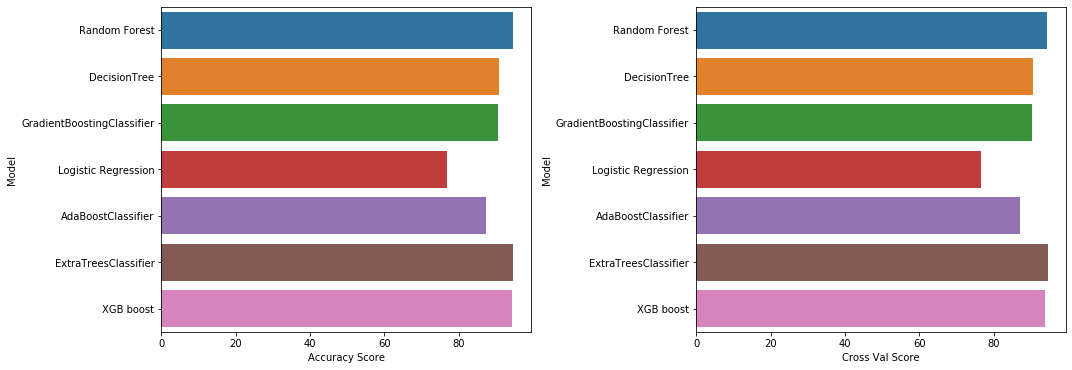

In [50]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [51]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    log_loss = metrics.log_loss(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print('log_loss : ', log_loss

    return metric_dict

## Tuning a model with GridSearchCV

In [52]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [53]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'accuracy')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 92.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 168.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 270.3min finished


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
0.9390806813367354


In [58]:
 #checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_acc_score(rf,x,y)

Max Accuracy Score corresponding to Random State  80 is: 0.9478126952302082




80

In [54]:
#.......Grid Search for DecisionTreeClassifier.....
gs_clfD=DecisionTreeClassifier()
parameters={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
        'criterion':['gini','entropy'],
         'max_depth': range(1,20,2),
        }
grid_cv(gs_clfD,parameters,'accuracy')

Fitting 5 folds for each of 5880 candidates, totalling 29400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 131.4min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 136.1min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 142.5min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 149.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 156.7min
[Parallel(n_jobs=-1)]: Done 9089 tasks   

In [56]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 99, 'min_samples_split': 2}
score: 0.8970717773745024


In [60]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
dtc =DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, max_leaf_nodes= 99, min_samples_split= 2)
print("DecisionTreeClassifier accuracy score:",max_acc_score(dtc,x,y))


Max Accuracy Score corresponding to Random State  92 is: 0.9017129407662468


DecisionTreeClassifier accuracy score: 92


# After all this process conclusion is that RandomForestClassifier  performing well because of high roc_auc score , accuracy score and f1 score .


In [61]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 57,test_size=0.20,stratify=y)
clf_rf=RandomForestClassifier(n_estimators=300,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
clf_rf.fit(x_train,y_train)
predrf=clf_rf.predict(x_test)
evaluate_preds(y_test,predrf)

Acc: 94.59%
Precision: 0.93
Recall: 0.96
F1 score: 0.95


{'accuracy': 0.95, 'precision': 0.93, 'recall': 0.96, 'f1': 0.95}

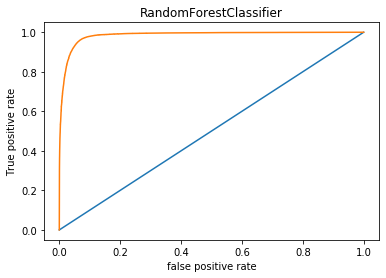

roc_auc_score =  0.9844521078473742


In [62]:
# Make predictions with probabilities
y_probs = clf_rf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[31977  2437]
 [ 1289 33126]]


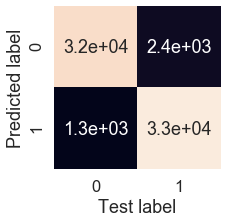

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predrf):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predrf),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predrf)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predrf))

In [64]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predrf
test
# On the lest side values are those fields which are taken by machine for test...

,label,Predicted values
132584,1,1
77306,1,1
282772,0,0
75695,1,1
133093,1,1
...,...,...
308911,0,0
184277,1,0
70031,1,1
69001,1,1


In [65]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predrf)
df1.to_csv('Project_Micro_Credit_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (label) 

In [66]:
# Find feature importance of our best model
clf_rf.feature_importances_

array([0.04783785, 0.10363084, 0.0620782 , 0.00167154, 0.05117123,
       0.14592876, 0.03407538, 0.09025324, 0.03982434, 0.03707209,
       0.00163744, 0.00048769, 0.07418348, 0.09170461, 0.09983335,
       0.01980423, 0.01249987, 0.02801491, 0.05829094])

In [67]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



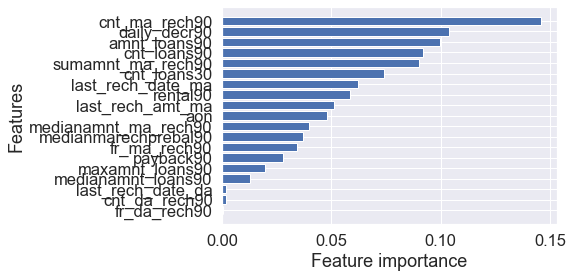

In [68]:
#bar plot of important features 
plot_features(x_train.columns, clf_rf.feature_importances_)
#Looks like cnt_ma_rech90 contribute the most.

In [69]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(clf_rf,'Project_Micro_Credit_submission.pkl')

['Project_Micro_Credit_submission.pkl']

In [70]:
#read the file using joblib
rf_from_joblib=joblib.load('Project_Micro_Credit_submission.pkl')
joblib_y_preds = rf_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 94.59%
Precision: 0.93
Recall: 0.96
F1 score: 0.95


{'accuracy': 0.95, 'precision': 0.93, 'recall': 0.96, 'f1': 0.95}

# End of Document